# Projeto de Ciência dos Dados 

**Professor: Fábio Roberto Miranda**

**Aluna: Giulia Araujo Castro - 2B - Engenharia Mecatrônica**

**Perguntas:**

Ao entrar na OPEP um país altera sua produção de petróleo? Pertencer à OPEP significa conseguir agregar valor aos barris de petróleo vendidos e aumentar a quaidade de vida de seus cidadões? 

## A OPEP

A OPEP (Organização dos Países Exportadores de Petróleo) funciona como uma espécie de cartel que unifica as leis e preços dos barris dos principais exportadores de petróleo, buscando, assim, estabilizar o mercado de petróleo. Ou seja, os paises participantes da OPEP conseguem agregar mais valor aos seus barris e, em teoria, conseguem ganhar a mesma quantidade de dinheiro produzindo menos.

Para saber mais, acesse o site da OPEP: https://www.opec.org/opec_web/en/about_us/23.htm

## Explicação da hipótese e mecanismo

Sabendo da premissa do funcionamento da OPEP, na teoria a organização buscaria agregar mais valor do que o normal aos barris de petróleo exportados pelos países pertencentes ao grupo. Porém, como mostrado no artigo abaixo, a Arábia Saudita apresenta um papel central e dominante na OPEP, caracterizando, na prática, a organização como um grupo com objetivos heterogêneos. Além disso, o artigo também analisa o sucesso da OPEP como organização à longo prazo e conclui que "apesar do sucesso de intervenções pontuais no mercado em momentos de crise e do impacto que suas decisões exercem sobre o preço do petróleo, a OPEP não é capaz de unir-se em torno de uma estratégia de longo prazo e, por isso, não dispõe credibilidade para tornar sua meta oficial de preços um bom parâmetro de mercado".

Sendo assim, espera-se que a produção de petróleo em cada país não seja modificada devido a participação do mesmo na OPEP, já que esta não trata-se da produção de petróleo, mas do preço dos barris exportados. Porém, espera-se nesse trabalho que o PIB desses países não cresca muito mais rapidamente do que o PIB dos países exportadores de petróleo que não participam da OPEP, pois, como observado pela pesquisa, devido aos interesses distintos dos participantes do grupo, a OPEP não consegue criar uma estratégia de mercado a longo prazo, falhando, assim, com o crescimento ao longo prazo do PIB. 

**Artigo disponível em: http://www.ie.ufrj.br/images/pesquisa/publicacoes/dissertacoes/2004/sobre_a_eficacia_da_opep_como_cartel_e_de_suas_metas_como_parametros_de_referencia_para_os_precos_do_petroleo.pdf**

## Bases de dados usadas

Foram coletados 2 dados do site https://www.gapminder.org/data/

1) Produção de petróleo anual

2) Crescimento anual do PIB

Com esses dados podemos observar a produção de petróleo ao redor do mundo (1) e observar se a OPEP tem influência na produção de cada país. Além disso, podemos observar se há um crescimento significativo do PIB (2) e se esse crecimento ao mesmo tempo gera uma redução do índice de Gini.  

## Análise dos dados

In [36]:
#Carregando as bibliotecas
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [37]:
#Abrindo as planílhas do Excel
produtores_petroleo = pd.read_excel('oil_production_total.xlsx')
pib = pd.read_excel('gdp_total_yearly_growth.xlsx')

In [38]:
#Lista com os países pertencentes à OPEP
paises_OPEP_1975 = ["Algeria", "Gabon", "Libya", "Nigeria", "Venezuela", "Ecuador", "Saudi Arabia", "United Arab Emirates", "Iran", "Iraq", "Kuwait", "Qatar", "Indonesia"]
paises_OPEP_1997 = ["Algeria", "Libya", "Nigeria", "Venezuela", "Saudi Arabia", "United Arab Emirates", "Iran", "Iraq", "Kuwait", "Qatar", "Indonesia"]
paises_OPEP_2016 = ["Angola", "Algeria", "Libya", "Nigeria", "Venezuela", "Ecuador", "Saudi Arabia", "United Arab Emirates", "Iran", "Iraq", "Kuwait", "Qatar", "Indonesia"]

In [39]:
#Criando coluna com valores 0 para todos os paises 
produtores_petroleo.loc[:, "opep"] = 0
pib.loc[:, "opep"] = 0

In [40]:
#Alterando o índice das tabelas 
produtores_petroleo_idx = produtores_petroleo.set_index('country')
produtores_petroleo_idx2 = produtores_petroleo.set_index('country')
produtores_petroleo_idx3 = produtores_petroleo.set_index('country')
pib_idx = pib.set_index('country')
pib_idx2 = pib.set_index('country')
pib_idx3 = pib.set_index('country')

In [41]:
#Alterando os valores dos países da OPEP de 0 para 1 nas tabelas
OPEP_1975 = produtores_petroleo_idx.loc[paises_OPEP, "opep"] = 1
OPEP_1997 = produtores_petroleo_idx2.loc[paises_OPEP_1975, "opep"] = 1
OPEP_2013 = produtores_petroleo_idx3.loc[paises_OPEP_2016, "opep"] = 1

PIB_1975 = pib_idx.loc[paises_OPEP_1975, "opep"] = 1
PIB_1997 = pib_idx2.loc[paises_OPEP_1975, "opep"] = 1
PIB_2013 = pib_idx3.loc[paises_OPEP_2016, "opep"] = 1

### Ao entrar na OPEP um país aumenta consideravelmente sua produção de petróleo?

Para analizar essa pergunta escolhemos observar os dados de 3 países (Gabão, Equador e Nigéria) ao longos dos anos de 1965 até 2000. A escolha dos países foi feita devido aos anos de entrada na OPEP, já que muitos entraram muito próximos, ou até antes, de 1965, ou então, entraram muito recentemente, o que prejudica a análise desejada.

In [42]:
#Recortando a tabela pegando apenas os países que desejamos utilizar
GNE = produtores_petroleo_idx.loc[["Gabon", "Nigeria", "Ecuador" ],:]

#Recortar os anos que desejados
P3 = GNE[GNE.columns[0:36]]

#Transpondo a tabela 
GNE_transpose = P3.transpose()

Text(0.5, 1.0, 'Produção de petróleo de 1965 até 2005')

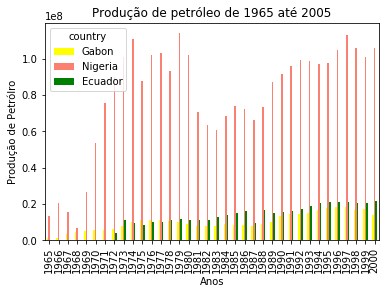

In [43]:
#Plotando o gráfico para a vizualização dos dados 
GNE_transpose.plot(kind='bar', color=('yellow', 'salmon', 'green'))
plt.ylabel('Produção de Petrólro')
plt.xlabel('Anos')
plt.title('Produção de petróleo de 1965 até 2005')

Como podemos ver para o Gabão, que entrou na OPEP em 1975 e saiu em 1994, participar do cartel não alterou a produção interna de petróleo. O país já passava por um aumento de produção e depois que entrou no cartel chegou ao seu pico diminuindo logo depois. Podemos ver também que, mesmo deixando o cartel em 1994, a produção depetróleo não é alterada. 

Para a Nigéria, que ingressou em 1971, podemos notar um alto crescimento na produção nos anos de 1972, 1973 e 1974. Porém, ao analizarmos o gráfico, nota-se que o país já apresentava um movimento alto de crescimento antes mesmo de entrar na OPEP. Sendo assim, não podemos chegar à uma conclusão se esse aumento foi ou não impulsionado pela participação na OPEP ou não. 

Em 1973 o Equador inicia a atuar como um membro da organização. Podemos notar um altíssimo aumento na prdução de petróleo nesse ano, que se manteve ao longo dos outros anos. O que talvez possa indicar que ingressar na OPEP o Equador buscou aumentar sua produção anual de petróleo. Porém, ao sair do cartel, em 1992, a produção continua a crescer em baixas taxas.   

**Será que a OPEP realmente era uma organização com representatividade no mercado produtivo de petróleo ao longo desses anos?**

Para analizar isso vamos fazer a análise da produção de petróleo em 1975, 1997 e em 2016 para entendermos qual foi a representatividade da OPEP ao longo dos anos.

**1975**

In [44]:
#Recortando a tabela pegando apenas os países que desejados e retirando os valores nulos
OPEP_1975 = produtores_petroleo_idx2.loc[:,[1975, "opep"]].dropna()

Text(0.5, 1.0, 'Produção de petróleo em 1975')

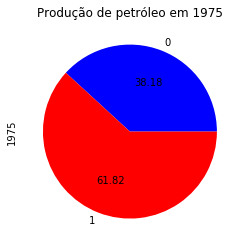

In [45]:
#Somando a produção de petróleo anual dos países
pie_1975 = OPEP_1975.groupby("opep").sum() 

#Plotando o gráfico para a visualização
pie_1975[1975].plot(kind='pie', colors=('blue', 'red'), autopct="%0.2f",legend=False)
plt.title('Produção de petróleo em 1975')

**1997**

In [46]:
#Recortando a tabela pegando apenas os países que desejados e retirando os valores nulos
OPEP_1997= produtores_petroleo_idx.loc[:,[1997, "opep"]].dropna()

Text(0.5, 1.0, 'Produção de petróleo em 1997')

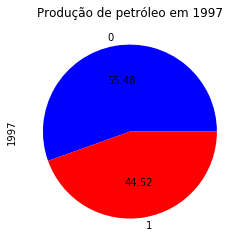

In [47]:
#Somando a produção de petróleo anual dos países
pie_1997 = OPEP_1997.groupby("opep").sum() 

#Plotando o gráfico para a visualização
pie_1997[1997].plot(kind='pie', colors=('blue', 'red'), autopct="%0.2f",legend=False)
plt.title('Produção de petróleo em 1997')

In [48]:
#Recortando a tabela pegando apenas os países que desejados e retirando os valores nulos
OPEP_2013 = produtores_petroleo_idx3.loc[:,[2013, "opep"]].dropna()

Text(0.5, 1.0, 'Produção de petróleo em 2013')

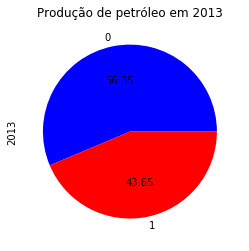

In [49]:
#Somando a produção de petróleo anual dos países
pie_2013 = OPEP_2013.groupby("opep").sum() 

#Plotando o gráfico para a visualização
pie_2013[2013].plot(kind='pie', colors=('blue', 'red'), autopct="%0.2f",legend=False)
plt.title('Produção de petróleo em 2013')

INSERIR ANÁLISE DOS GRÁFICOS

### Análise do PIB dos países

In [50]:
#Recortando a tabela pegando apenas os países que desejamos utilizar
PIB_1975 = pib_idx.loc[:,[1975, "opep"]].dropna()
PIB_1997 = pib_idx2.loc[:,[1997, "opep"]].dropna()
PIB_2013 = pib_idx3.loc[:,[2013, "opep"]].dropna()

In [55]:
#Fazendo a junção de tabelas
PIB_PP_1975 = OPEP_1975.join(PIB_1975, how='inner', lsuffix='_PIB', rsuffix='_petroleo')
PIB_PP_1997 = OPEP_1997.join(PIB_1997, how='inner', lsuffix='_PIB', rsuffix='_petroleo')
PIB_PP_2013 = OPEP_2013.join(PIB_2013, how='inner', lsuffix='_PIB', rsuffix='_petroleo')


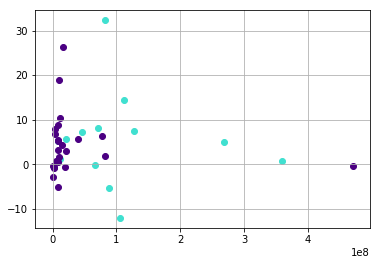

In [58]:
plt.scatter(PIB_PP_1975.loc[PIB_PP_1975.opep_PIB == 1, "1975_PIB"], PIB_PP_1975.loc[PIB_PP_1975.opep_petroleo == 1,"1975_petroleo"], color="turquoise")
plt.scatter(PIB_PP_1975.loc[PIB_PP_1975.opep_PIB == 0, "1975_PIB"], PIB_PP_1975.loc[PIB_PP_1975.opep_petroleo == 0,"1975_petroleo"], color="indigo")
plt.grid()